Name-Bidit Sadhukhan


Reg. No.- B2230022

BDA-3 22-24

Installing the Required packages

1.   Numpy
2.   Pandas
3.   Matplotlib
4.   Tensorflow
5.   Scikit-learn
6.   Keras
7.   tqdm



In [ ]:
#Installing the required packages
!pip install pandas
!pip install matplotlib
!pip install tensorflow
!pip install scikit-learn
!pip install tqdm

Importing the required packages


1.   Numpy
2.   Pandas
3.   Matplotlib
4.   Tensorflow
5.   Scikit-learn
6.   Keras
7.   tqdm



In [ ]:
#Importing the packages
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from tqdm import tqdm
from keras.utils.np_utils import to_categorical

* Loading the iris dataset from sklearn.datasets, then splitting it into
  train and test in the ratio of 80:20
* After that the train part is further split into training and validation
* Checking the shape of the data


In [ ]:
iris_data=datasets.load_iris() #Loading the iris dataset
X=iris_data.data
y=iris_data.target
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.2,random_state=5)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=5)
print(X_train.shape) #checking the shape
print(X_valid.shape)
print(X_test.shape)

(96, 4)
(24, 4)
(30, 4)


Converting the labels into categorical using the to_categorical function from keras.utils

In [ ]:
y_train=to_categorical(y_train) #converting to categorical
y_valid=to_categorical(y_valid)
y_test=to_categorical(y_test)
print(y_test.shape[1])
print(y_train.shape) #checking the shape
print(y_valid.shape)

3
(96, 3)
(24, 3)


## Question a)

Building and compiling the model

In [34]:
classification_1=keras.models.Sequential([
  keras.layers.Flatten(input_shape=[4]),
  keras.layers.Dense(10,activation="relu",kernel_initializer="he_normal"),
  keras.layers.Dense(3,activation="softmax"),
])    #defining the model
classification_1.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"]) #compiling the model

Fitting the model

In [35]:
classification_1.summary()  #checking the summary
history_1=classification_1.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid),verbose=0)

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_52 (Flatten)        (None, 4)                 0         
                                                                 
 dense_124 (Dense)           (None, 10)                50        
                                                                 
 dense_125 (Dense)           (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


Plot the training and validation accuracy

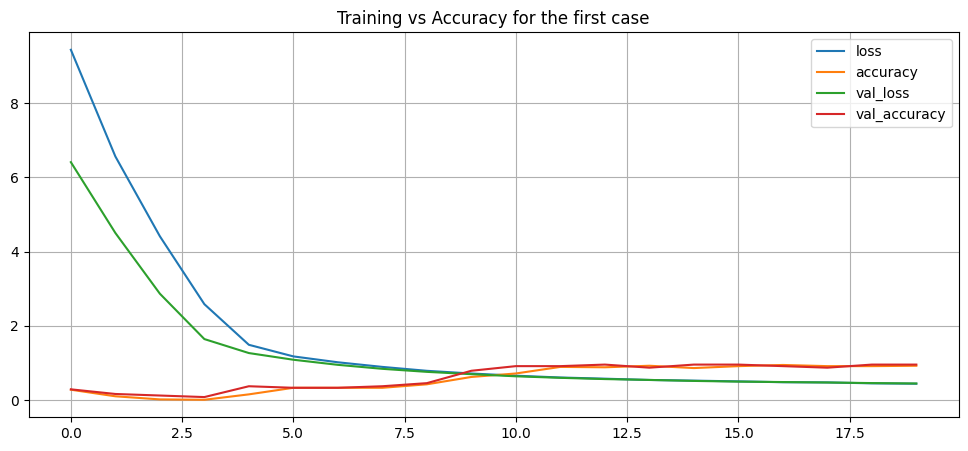

In [36]:
pd.DataFrame(history_1.history).plot(figsize=(12,5))
plt.grid(True)
plt.title("Training vs Accuracy for the first case")
plt.gca()
plt.show()

Evaluating the model on the test and validation

In [37]:
train_accuracy=classification_1.evaluate(X_train,y_train)
test_accuracy=classification_1.evaluate(X_test,y_test)
valid_accuracy=classification_1.evaluate(X_valid,y_valid)
print("Training Accuracy is",{train_accuracy[1]})
print("Test Accuracy is" ,{test_accuracy[1]})
print("Validation Accuracy is", {valid_accuracy[1]})

1/1 [==============================] - 0s 28ms/step - loss: 0.4493 - accuracy: 0.9583
Training Accuracy is {0.9375}
Test Accuracy is {0.8333333134651184}
Validation Accuracy is {0.9583333134651184}


## Question b)

Accuracy vs number of neurons in hidden layer

In [ ]:
accuracy=[]
neurons=np.arange(3,21)

for n in neurons:
  classification_2=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[4]),
    keras.layers.Dense(n,activation="relu",kernel_initializer="he_normal"),
    keras.layers.Dense(3,activation="softmax"),
  ])
  classification_2.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
  epochs = 20
  progress_bar = tqdm(total=epochs, position=0, leave=True)
  for epoch in range(epochs):
    history_2=classification_2.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid),verbose=0)
    progress_bar.update(1)

  progress_bar.close()

  final_accuracy = history_2.history['accuracy'][-1]
  accuracy.append(final_accuracy)

100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


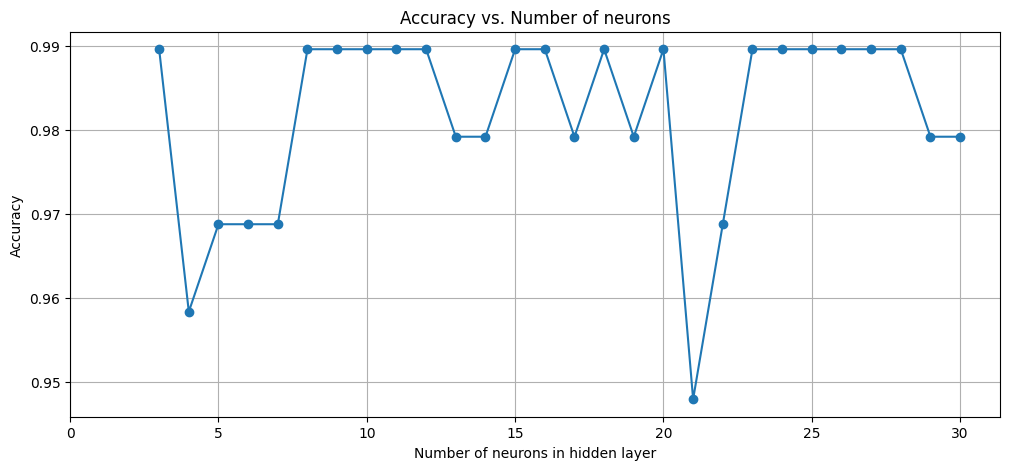

In [ ]:
# Plot the accuracy vs. Neurons in Hidden Layer
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(neurons, accuracy, marker='o')
plt.title('Accuracy vs. Number of neurons')
plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 31, 5))
plt.show()

## Question c)

Accuracy vs dropout probability

In [ ]:
dropout_probabilities = np.arange(0.1, 0.8, 0.1)
accuracies = []

for dropout_prob in dropout_probabilities:
    classification_dropout = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[4]),
        keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(dropout_prob),
        keras.layers.Dense(3, activation="softmax"),
    ])

    classification_dropout.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    epochs = 20
    progress_bar = tqdm(total=epochs, position=0, leave=True)


    for epoch in range(epochs):
        history_3 = classification_dropout.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0)
        progress_bar.update(1)

    progress_bar.close()
    final_accuracy_1= history_3.history['accuracy'][-1]
    accuracies.append(final_accuracy_1)


100%|██████████| 20/20 [00:22<00:00,  1.15s/it]


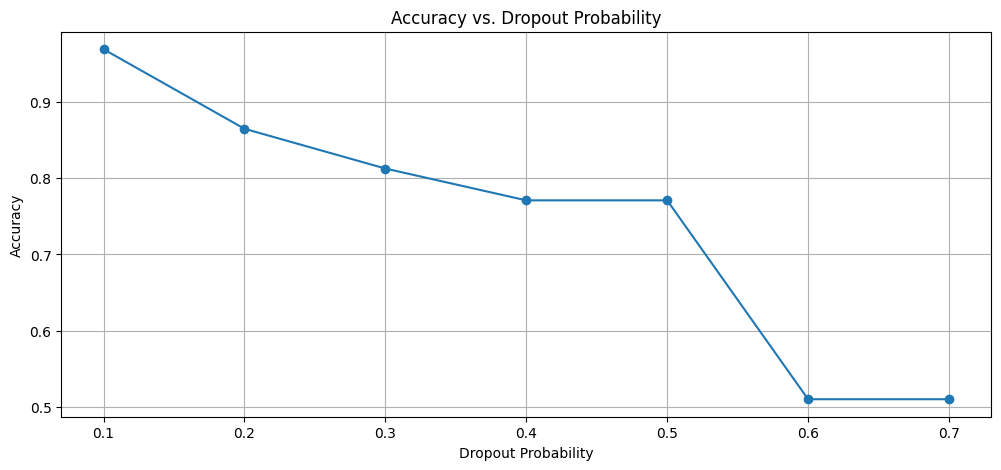

In [ ]:
# Plot the accuracy vs. dropout probability
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(dropout_probabilities, accuracies, marker='o')
plt.title('Accuracy vs. Dropout Probability')
plt.xlabel('Dropout Probability')
plt.ylabel('Accuracy')
plt.show()

## Question d)

Accuracy vs number of hidden layers

In [32]:
hidden_layers = np.arange(1, 6)
accuracy_1 = []

for num_layers in hidden_layers:
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[4]))

    for _ in range(num_layers):
        model.add(keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal"))

    model.add(keras.layers.Dense(3, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

    epochs = 20
    progress_bar = tqdm(total=epochs, position=0, leave=True)
    for epoch in range(epochs):
        history_4 = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid,y_valid), verbose=0)
        progress_bar.update(1)

    progress_bar.close()
    final_accuracy_2 = history_4.history['accuracy'][-1]
    accuracy_1.append(final_accuracy_2)


100%|██████████| 20/20 [00:08<00:00,  2.47it/s]


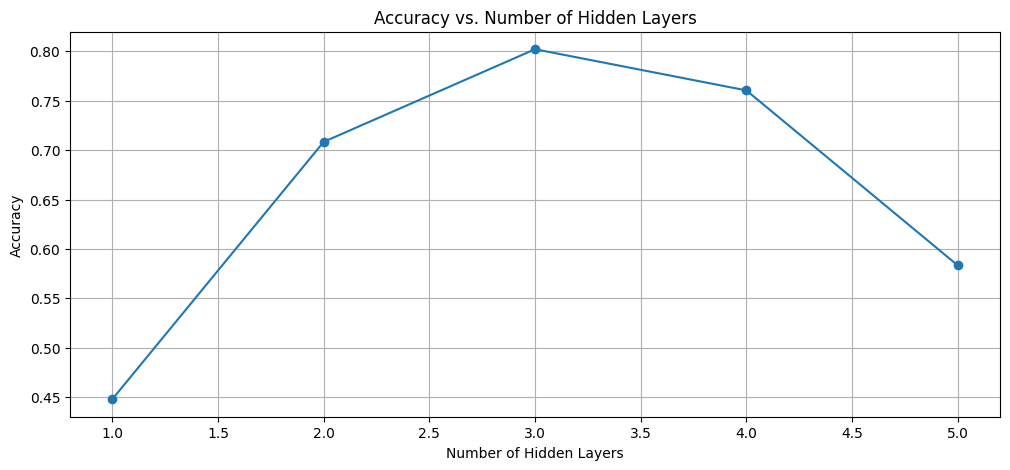

In [33]:
# Plot the number of layers vs. accuracy
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(hidden_layers, accuracy_1, marker='o')
plt.title('Accuracy vs. Number of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.show()

## Question e)

Accuracy vs optimiser

In [30]:
optimiser=['sgd','adadelta','adagrad','adam','RMSprop']
accuracy_2=[]

classification_optimiser=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[4]),
    keras.layers.Dense(30,activation="relu",kernel_initializer="he_normal"),
    keras.layers.Dense(3,activation="softmax"),
])
for opt in optimiser:
    classification_optimiser.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
    epochs = 20
    progress_bar = tqdm(total=epochs, position=0, leave=True)
    for epoch in range(epochs):
        history_5 = classification_optimiser.fit(X_train, y_train, epochs=1, validation_data=(X_valid,y_valid), verbose=0)
        progress_bar.update(1)
    progress_bar.close()
    final_accuracy_3 = history_5.history['accuracy'][-1]
    accuracy_2.append(final_accuracy_3)


100%|██████████| 20/20 [00:04<00:00,  4.75it/s]


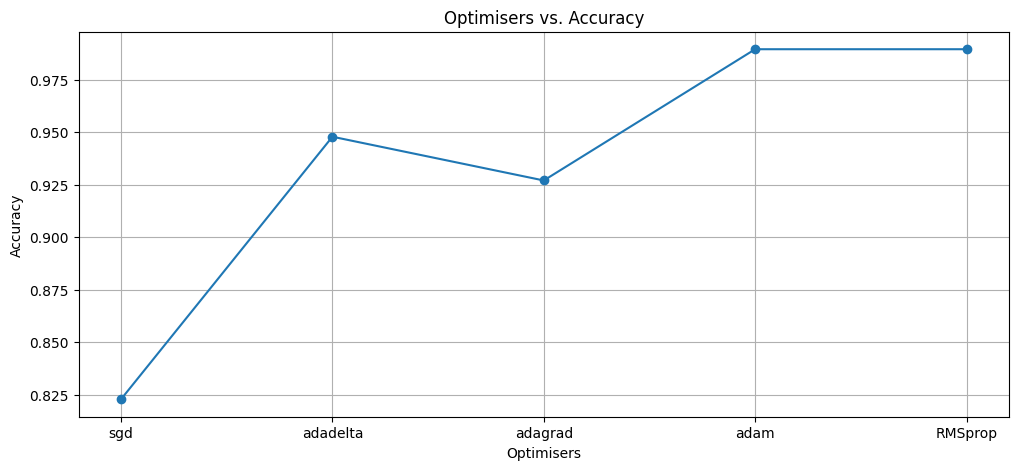

In [31]:
# Plot the optimisers vs. accuracy
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(optimiser, accuracy_2, marker='o')
plt.title('Optimisers vs. Accuracy')
plt.xlabel('Optimisers')
plt.ylabel('Accuracy')
plt.show()